# The dataset is from 2024-2-10 to 2025-2-10 from Shanghai Stock Exchange Convertible Bond.

In [3]:
import numpy as np
import pandas as pd

df = pd.read_csv("SSE Convertible Bond Historical Data.csv")
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/10/2025,378.23,378.00,378.30,376.87,17.96K,0.10%
1,02/07/2025,377.84,376.39,379.25,376.02,19.27K,0.53%
2,02/06/2025,375.86,373.17,375.93,372.93,15.96K,0.69%
3,02/05/2025,373.27,373.46,373.60,372.33,14.12K,0.20%
4,01/27/2025,372.54,373.83,374.78,372.40,13.30K,-0.29%


In [4]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [7]:
# Data cleaning & Preprocessing

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'],format='%m/%d/%Y')

# Convert 'Change %' to numerical format
df['Change %'] = df['Change %'].astype(str).str.replace('%','').astype(float)/100

# Convert 'Vol.' to numerical format (handling 'K' for thousands)
df['Vol.'] = df['Vol.'].astype(str).str.replace('K','').astype(float)*1_000

# Sort data by Date(ascending order)
df = df.sort_values(by='Date')

df.info(),df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 235 to 0
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      236 non-null    datetime64[ns]
 1   Price     236 non-null    float64       
 2   Open      236 non-null    float64       
 3   High      236 non-null    float64       
 4   Low       236 non-null    float64       
 5   Vol.      236 non-null    float64       
 6   Change %  236 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 14.8 KB


(None,
           Date   Price    Open    High     Low     Vol.  Change %
 235 2024-02-19  338.84  338.34  339.43  337.77  14630.0  0.000036
 234 2024-02-20  341.37  338.90  341.45  338.30  16240.0  0.000075
 233 2024-02-21  343.39  341.12  344.92  340.86  18130.0  0.000059
 232 2024-02-22  344.35  343.42  344.47  342.84  17560.0  0.000028
 231 2024-02-23  344.68  344.32  345.21  343.63  13010.0  0.000010)

<bound method NDFrame.describe of       Price    Open    High     Low     Vol.  Change %
235  338.84  338.34  339.43  337.77  14630.0  0.000036
234  341.37  338.90  341.45  338.30  16240.0  0.000075
233  343.39  341.12  344.92  340.86  18130.0  0.000059
232  344.35  343.42  344.47  342.84  17560.0  0.000028
231  344.68  344.32  345.21  343.63  13010.0  0.000010
..      ...     ...     ...     ...      ...       ...
4    372.54  373.83  374.78  372.40  13300.0 -0.000029
3    373.27  373.46  373.60  372.33  14120.0  0.000020
2    375.86  373.17  375.93  372.93  15960.0  0.000069
1    377.84  376.39  379.25  376.02  19270.0  0.000053
0    378.23  378.00  378.30  376.87  17960.0  0.000010

[236 rows x 6 columns]>

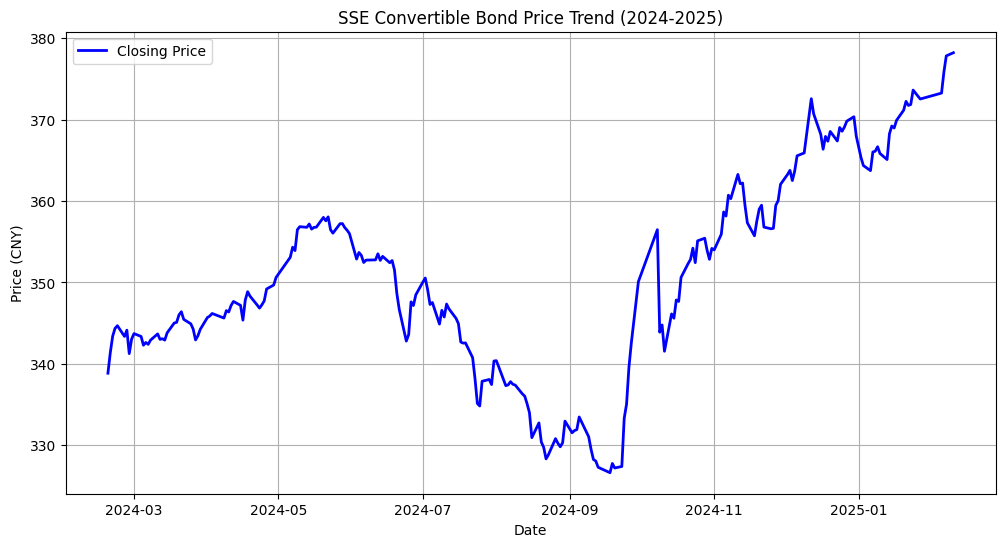

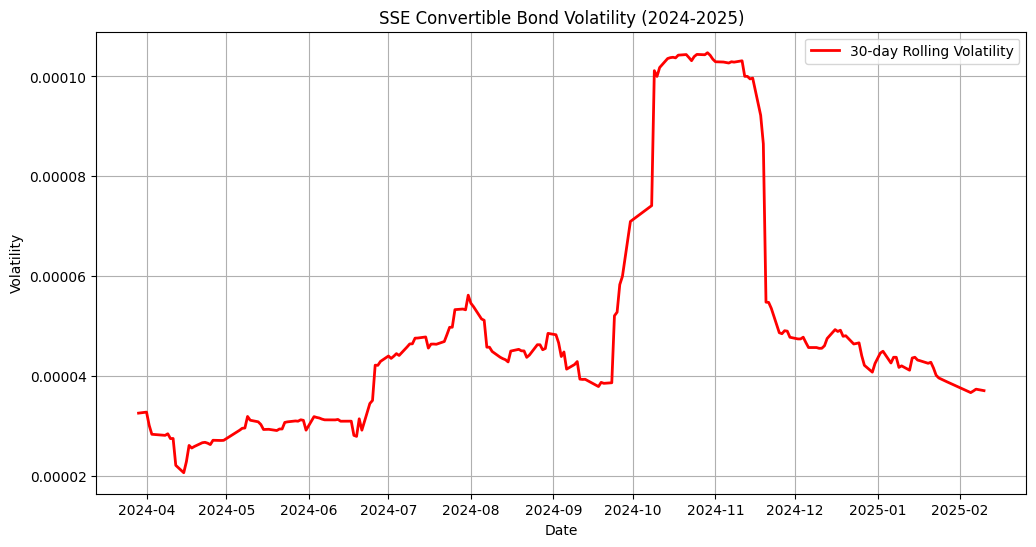

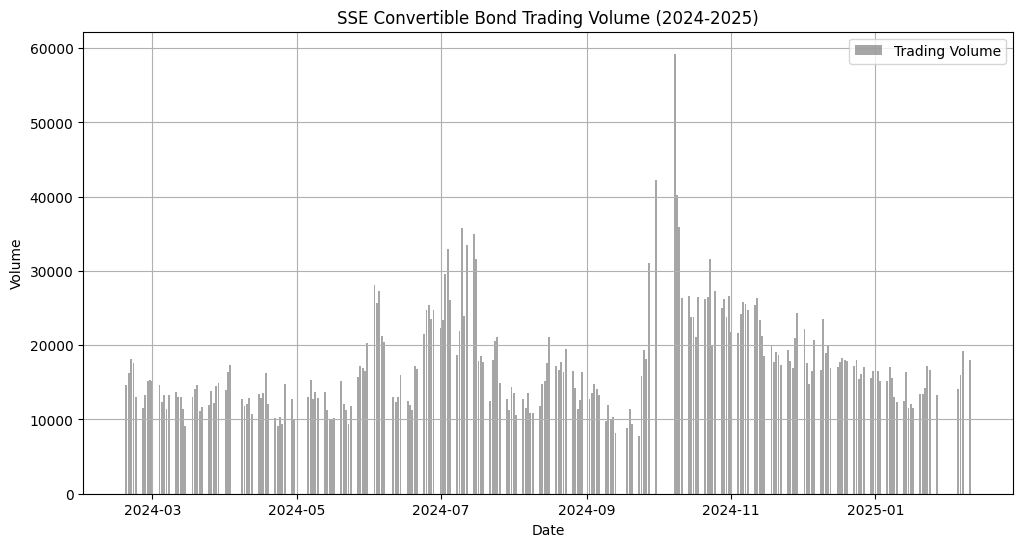

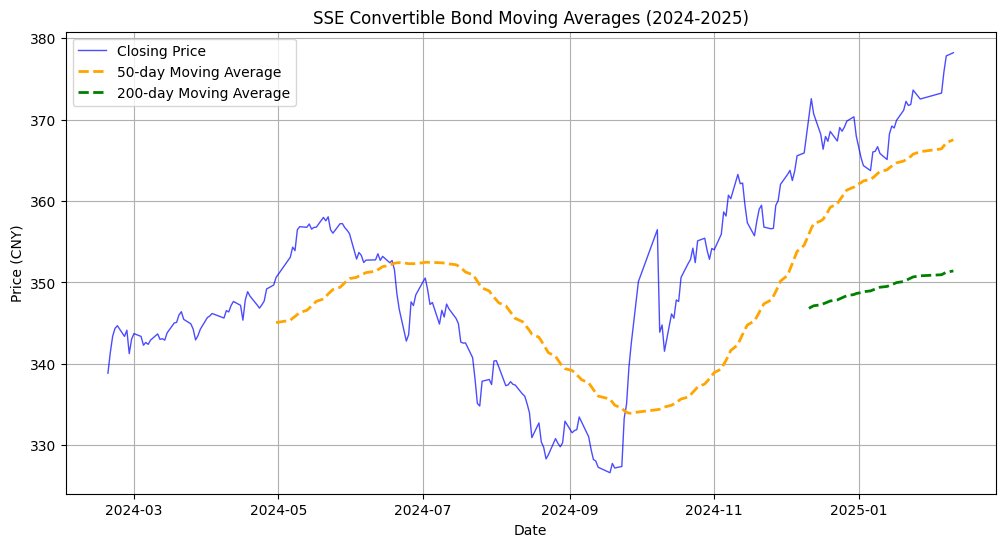

In [11]:
import matplotlib.pyplot as plt

# Descriptive Statistics

desc_stats = df[['Price','Open','High','Low','Vol.','Change %']].describe

from IPython.display import display
display(desc_stats)

# Plot Price Trends
plt.figure(figsize=(12,6))
plt.plot(df['Date'],df['Price'],label='Closing Price',color='Blue',linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.title('SSE Convertible Bond Price Trend (2024-2025)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate 30-day rolling volatility
df['Volatility'] = df['Change %'].rolling(window=30).std()

# Plot Volatility Trends
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volatility'], label='30-day Rolling Volatility', color='red', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('SSE Convertible Bond Volatility (2024-2025)')
plt.legend()
plt.grid(True)
plt.show()

# Plot Trading Volume Trends
plt.figure(figsize=(12, 6))
plt.bar(df['Date'], df['Vol.'], color='gray', alpha=0.7, label='Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('SSE Convertible Bond Trading Volume (2024-2025)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate 50-day and 200-day Moving Averages
df['MA50'] = df['Price'].rolling(window=50).mean()
df['MA200'] = df['Price'].rolling(window=200).mean()

# Plot Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Price'], label='Closing Price', color='blue', linewidth=1, alpha=0.7)
plt.plot(df['Date'], df['MA50'], label='50-day Moving Average', color='orange', linestyle='dashed', linewidth=2)
plt.plot(df['Date'], df['MA200'], label='200-day Moving Average', color='green', linestyle='dashed', linewidth=2)
plt.xlabel('Date')
plt.ylabel('Price (CNY)')
plt.title('SSE Convertible Bond Moving Averages (2024-2025)')
plt.legend()
plt.grid(True)
plt.show()

## Conclusiton

### 1. Price Trend and Growth

##### 1.1
The price trend plot indicates a gradual increase in the SSE convertible bond index over the past year.

#### 1.2
Despite some short-term fluctuations, the overall upward trend suggests investor confidence in the convertible bond market.

#### 1.3
The moving average analysis (50-day & 200-day) shows that the market was mostly in a bullish phase, with the 50-day moving average staying above the 200-day moving average.

### 2. Market Volatility

#### 2.1
The volatility chart (30-day rolling volatility) indicates periods of increased price fluctuations.

#### 2.2
Spikes in volatility suggest that some major events or market sentiment shifts may have influenced bond pricing.

#### 2.3
However, the volatility remains within a stable range, meaning the market is relatively less risky compared to equities.

### Trading Volume & Liquidity

#### 3.1
The trading volume plot shows several peaks, indicating periods of higher investor activity.

#### 3.2
There are noticeable spikes in liquidity, likely corresponding to specific events such as new bond issuances, earnings announcements, or macroeconomic factors affecting bond yields.

#### 3.3
The presence of both high-volume and low-volume periods suggests that liquidity is not uniform, and investors should be cautious during low-volume periods to avoid price slippage.

### Short-Term vs. Long-Term Market Sentiment

#### 4.1
The short-term moving average (50-day) follows the price closely, suggesting that the bond market reacts quickly to new information.

#### 4.2
The long-term moving average (200-day) remains smoother, showing a long-term upward trajectory in convertible bond prices.

#### 4.3
When the 50-day moving average crosses below the 200-day moving average, it could indicate a potential trend reversal (bearish signal), while the opposite suggests a continued bullish market.

### Yield and Market Performance

#### 5.1
The descriptive statistics show a consistent average daily change percentage, suggesting that the market does not experience extreme swings.

#### 5.2
A relatively narrow interquartile range in price data further supports the idea that convertible bonds are less volatile than traditional equities.

#### 5.3
This makes them an attractive option for risk-averse investors who seek a balance between fixed-income stability and equity growth potential.

### Key Takeaways

#### 1.
Convertible bonds in SSE exhibited a steady upward trend over the year, making them a promising asset for long-term investment.

#### 2.
Volatility is present but relatively controlled, meaning the risk remains moderate.

#### 3.
Liquidity fluctuates, so investors should consider volume trends before making trades.

#### 4.
Moving averages suggest a bullish market with occasional short-term corrections.

#### 5.
The market is attractive for both bond investors seeking stability and equity investors looking for upside potential.